In [1]:
import urllib, json
import numpy as np

url = "https://s3.amazonaws.com/cttransit-realtime-prod/vehiclepositions_pb.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())

print(np.shape(data['entity'])[0])
locations = np.ones([2,np.shape(data['entity'])[0]])
speeds = np.ones([1,np.shape(data['entity'])[0]])
stops = np.ones([1,np.shape(data['entity'])[0]])
for i in range(np.shape(data['entity'])[0]):
    print(i)
    locations[0][i] = data['entity'][i]['vehicle']['position']['latitude']
    locations[1][i] = data['entity'][i]['vehicle']['position']['longitude']
    speeds[0][i] = data['entity'][i]['vehicle']['position']['speed']
  #  stops[i] = data['entity'][0]['vehicle']['current_status']
print(speeds)

239
0


KeyError: 'speed'

In [ ]:
import geopandas as gpd
map = gpd.read_file('Trans_RoadSegment.shp')
fig,ax = plt.subplots(figsize=(10,10))
map.plot(ax=ax)

In [ ]:
url2 = 'https://gist.githubusercontent.com/camille-s/c8cfa583ef22105e90d53ceb299f1a7b/raw/fc087f30ddb2658a05fb5408f1e9d5276b8a433d/nhv.json'
response2 = urllib.request.urlopen(url2)
data2 = json.loads(response2.read())


In [ ]:
edgewood_locs = np.ones([2,np.shape(data2['features'][0]['geometry']['coordinates'][0])[0]])
locs2 = np.ones([2,np.shape(data2['features'][1]['geometry']['coordinates'][0])[0]])
locs3 = np.ones([2,np.shape(data2['features'][2]['geometry']['coordinates'][0])[0]])
locs4 = np.ones([2,np.shape(data2['features'][3]['geometry']['coordinates'][0])[0]])
locs5 = np.ones([2,np.shape(data2['features'][4]['geometry']['coordinates'][0])[0]])
locs6 = np.ones([2,np.shape(data2['features'][5]['geometry']['coordinates'][0])[0]])
locs7 = np.ones([2,np.shape(data2['features'][6]['geometry']['coordinates'][0])[0]])
locs8 = np.ones([2,np.shape(data2['features'][7]['geometry']['coordinates'][0])[0]])
locs9 = np.ones([2,np.shape(data2['features'][8]['geometry']['coordinates'][0])[0]])
locs10 = np.ones([2,np.shape(data2['features'][9]['geometry']['coordinates'][0])[0]])
locs11 = np.ones([2,np.shape(data2['features'][10]['geometry']['coordinates'][0])[0]])
locs12 = np.ones([2,np.shape(data2['features'][11]['geometry']['coordinates'][0])[0]])
locs13 = np.ones([2,np.shape(data2['features'][12]['geometry']['coordinates'][0])[0]])
locs14 = np.ones([2,np.shape(data2['features'][13]['geometry']['coordinates'][0])[0]])
locs15 = np.ones([2,np.shape(data2['features'][14]['geometry']['coordinates'][0])[0]])
locs16 = np.ones([2,np.shape(data2['features'][15]['geometry']['coordinates'][0])[0]])
locs17 = np.ones([2,np.shape(data2['features'][16]['geometry']['coordinates'][0])[0]])
locs18 = np.ones([2,np.shape(data2['features'][17]['geometry']['coordinates'][0])[0]])
locs19 = np.ones([2,np.shape(data2['features'][18]['geometry']['coordinates'][0])[0]])
locs20 = np.ones([2,np.shape(data2['features'][19]['geometry']['coordinates'][0])[0]])
locsx = np.ones([2,1727])

names = [edgewood_locs, locs2, locs3, locs4, locs5, locs6, locs7, locs8, locs9, locs10, locs11, locs12, locs13, locs14, locs15, locs16, locs17, locs18, locs19, locs20]


#print(data2['features'][0]['geometry'])

print(data2['features'][15]['geometry']['coordinates'][0][0][0])
counter=-1
for j in range(0,20):
    print(j)
    for i in range(np.shape(data2['features'][j]['geometry']['coordinates'][0])[0]):
        counter=counter+1
        names[j][0][i] = data2['features'][j]['geometry']['coordinates'][0][i][0]
        names[j][1][i] = data2['features'][j]['geometry']['coordinates'][0][i][1]
        locsx[0][counter] = data2['features'][j]['geometry']['coordinates'][0][i][0]
        locsx[1][counter] = data2['features'][j]['geometry']['coordinates'][0][i][1]
print(counter)

In [ ]:
for i in names:
    plt.plot(i[0],i[1])

In [ ]:
print(locsx)
plt.scatter(locsx[0],locsx[1],s=1)

In [ ]:
plt.plot(edgewood_locs[0],edgewood_locs[1]);
print(edgewood_locs[0])

AttributeError: type object 'map' has no attribute 'plot'

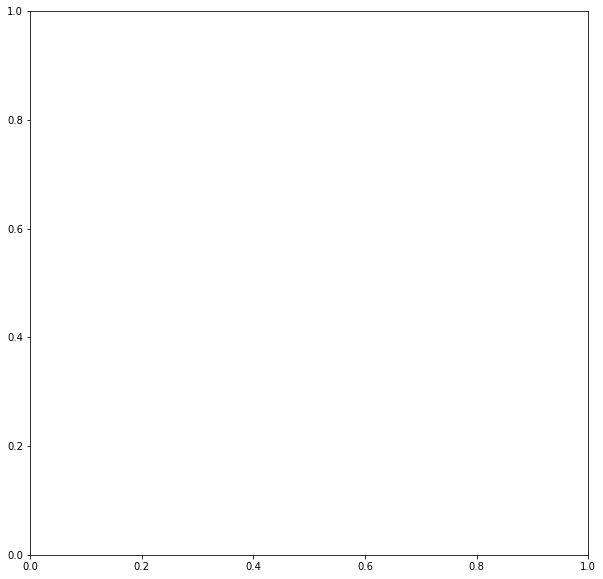

In [14]:
#print(locations)
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
map.plot(ax=ax)
for i in names:
    ax.plot(i[0],i[1])
#plt.scatter(locsx[0],locsx[1],s=1)
ax.scatter(locations[1],locations[0],c='red')
plt.xlim(-72.98,-72.88)
plt.ylim(41.26,41.355)
#print(locations)

In [13]:
import pandas as pd
stop_times = pd.read_csv('stop_times.txt')
routes = pd.read_csv('routes.txt')
stops = pd.read_csv('stops.txt')
shapes = pd.read_csv('shapes.txt')

In [ ]:
print(routes)

In [15]:
import urllib, json
import numpy as np

class bus():
    def __init__(self, new_data, number):
        self.lat = new_data['entity'][number]['vehicle']['position']['latitude']
        self.lon = new_data['entity'][number]['vehicle']['position']['longitude']
        self.route_id = new_data['entity'][number]['vehicle']['trip']['route_id']
        self.trip_id = new_data['entity'][number]['vehicle']['trip']['trip_id']
        try:
            self.speed = new_data['entity'][number]['vehicle']['position']['speed']
        except:
            self.speed = 0

def update_buses():
    #Import data
    url = "https://s3.amazonaws.com/cttransit-realtime-prod/vehiclepositions_pb.json"
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    
    buses = []
    for i in range(0,np.shape(data['entity'])[0]):
        new_bus = bus(data,i)
        buses.append(new_bus)
    return buses

def draw_bus_locations(fig,ax,buses):
    for i in buses:
        ax.scatter(i.lon,i.lat,c='red')

In [16]:
buses = update_buses()
print(buses[50].lon)

-72.67726


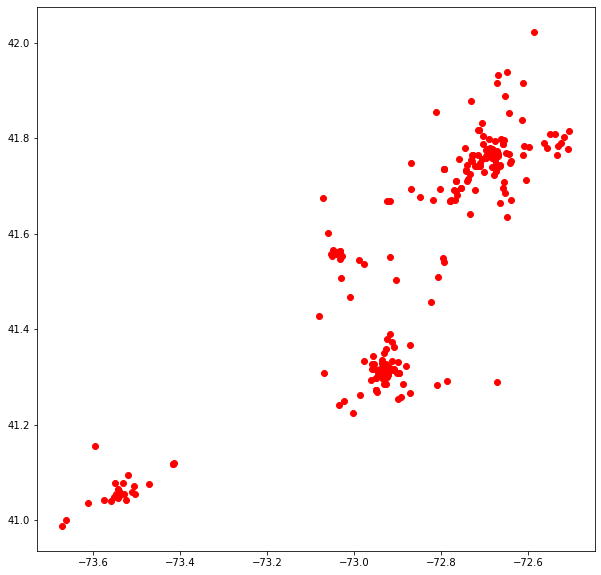

In [17]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
draw_bus_locations(fig,ax,buses)

In [3]:
import pandas as pd
shapes = pd.read_csv('shapes.txt')

In [ ]:
print(shapes)

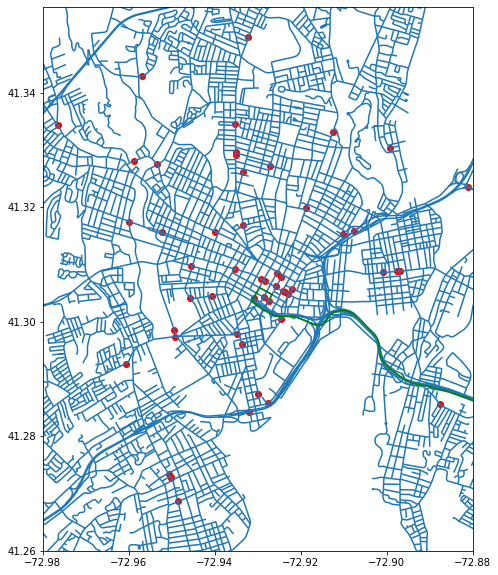

In [18]:
#Code that will plot a shape
import geopandas as gpd
fig,ax = plt.subplots(figsize=(10,10))
diff_shapes = shapes['shape_id'].unique()
condition = (shapes['shape_id']==136845)
map = gpd.read_file('Trans_RoadSegment.shp')
map.plot(ax=ax)
ax.set_xlim(-72.98,-72.88)
ax.set_ylim(41.26,41.355)
draw_bus_locations(fig,ax,buses)
ax.plot(shapes[condition]['shape_pt_lon'],shapes[condition]['shape_pt_lat'],c='green')


In [23]:
trips = pd.read_csv('trips.txt')

In [7]:
my_string="hello python world , i'm a beginner "
my_string.split("world")[1]

" , i'm a beginner "

In [ ]:
print(trips['trip_headsign'])

In [24]:
#Coding finding all the routes in New Haven
names = trips['trip_headsign'].unique()
routes = []
for i in names:
    result = str(i).find('New Haven')
    if result!=-1:
        unique_routes = trips.loc[trips['trip_headsign']==i]['route_id'].unique()
        for i in unique_routes:
            routes.append(i)
routes= np.array(routes)
routes = np.unique(routes)
print(routes)

['10844' '12420' '12421' '12424' '12425' '12426' '12428' '12429' '12430'
 '12431' '12432' '12433' '12434' '12436' '12437' '12438' '12439' '12440'
 '12441' '12442' '12445' 'CONGRESS AVE']


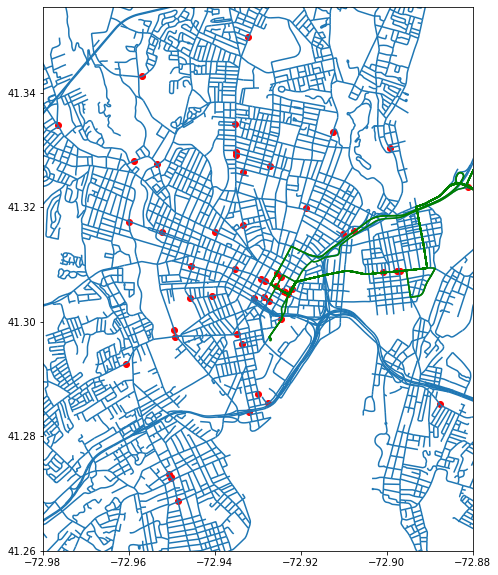

In [25]:
fig,ax = plt.subplots(figsize=(10,10))
map = gpd.read_file('Trans_RoadSegment.shp')
map.plot(ax=ax)
ax.set_xlim(-72.98,-72.88)
ax.set_ylim(41.26,41.355)
draw_bus_locations(fig,ax,buses)

#Plot the shape of a route given a route ID
route_id = '12421'
route_shape = trips.loc[trips['route_id']==route_id]['shape_id'].unique()
for i in route_shape:
    condition = (shapes['shape_id']==i)
    ax.plot(shapes[condition]['shape_pt_lon'],shapes[condition]['shape_pt_lat'],c='green')

In [ ]:
for i in buses:
    if i.route_id == route_id:
        print(i)
    else:
        print(0)

In [ ]:
print(np.shape(trips['trip_id']))

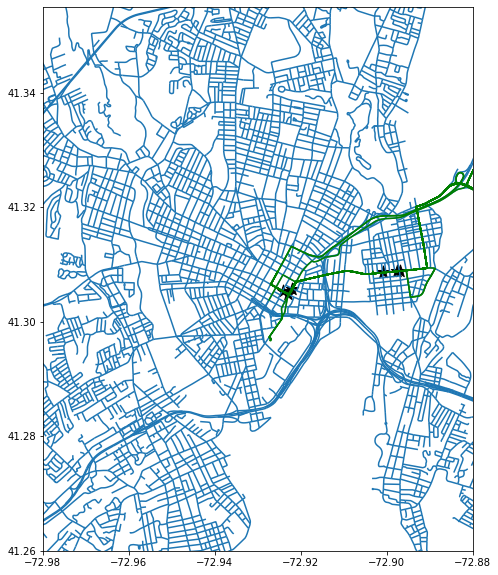

In [26]:
fig,ax = plt.subplots(figsize=(10,10))
map.plot(ax=ax)
ax.set_xlim(-72.98,-72.88)
ax.set_ylim(41.26,41.355)
#draw_bus_locations(fig,ax,buses)

route_shape = trips.loc[trips['route_id']==route_id]['shape_id'].unique()
for i in route_shape:
    condition = (shapes['shape_id']==i)
    ax.plot(shapes[condition]['shape_pt_lon'],shapes[condition]['shape_pt_lat'],c='green')

trip_ids = []
for i in buses:
    if i.route_id == route_id:
        trip_ids.append(i.trip_id)
    else:
        0
        
new_buses = []
for i in trip_ids:
    for j in buses:
        if j.trip_id==i:
            new_buses.append(j)
for i in new_buses:
    ax.scatter(i.lon,i.lat,c='black',marker='*',s=170)

In [ ]:
import time
t = time.localtime()
print(t)
print(time.asctime(t))

In [10]:
stop_times = pd.read_csv('stop_times.txt')
trips = pd.read_csv('trips.txt')
stops = pd.read_csv('stops.txt')

/Users/helena/anaconda3/envs/a330/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
my_trip_id = trips.loc[trips['route_id']==route_id]['trip_id'].unique()
#print(my_trip_id) many trips in the route that you choose
nums = stop_times.loc[stop_times['trip_id'==my_trip_id[0]]]

KeyError: False

In [28]:
url = "https://s3.amazonaws.com/cttransit-realtime-prod/vehiclepositions_pb.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())

buses = []
for i in range(0,np.shape(data['entity'])[0]):
    new_bus = bus(data,i)
    buses.append(new_bus)
    
t = time.localtime()
trip_id = 1442567
nums = stop_times.loc[stop_times['trip_id']==trip_id]
next_stops = nums[(nums['arrival_time']>time.asctime(t)[11:19])]
stop_id = next_stops.iloc[0]['stop_id']
stop_name = stops.loc[stops['stop_id']==stop_id]['stop_name']
stop_name = stop_name.iloc[0]
print(stop_name)
print('Next stop is: ' + stop_name)

NameError: name 'time' is not defined

In [ ]:
print(time.asctime(t)[11:19])

In [13]:
url = "https://s3.amazonaws.com/cttransit-realtime-prod/vehiclepositions_pb.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())

buses = []
for i in range(0,np.shape(data['entity'])[0]):
    new_bus = bus(data,i)
    buses.append(new_bus)

t = time.localtime()
trip_id = buses[1].trip_id
nums = stop_times.loc[stop_times['trip_id']==int(trip_id)]
next_stops = nums[(nums['arrival_time']>time.asctime(t)[11:19])]
stop_id = next_stops.head(1)['stop_id']
stop_name = stops.loc[stops['stop_id']==str(int(stop_id))]['stop_name']
print('Next stop is: ' + stop_name)

NameError: name 'time' is not defined

In [22]:
route_id = str(10815)
lon = -72.7819
lat = 41.667
#print(trips['route_id'==route_id])
route_shape = trips.loc[trips['route_id']==route_id]['shape_id'].unique()
print(route_shape)
next_step_lon = 0
next_step_lat = 0
first_lat = shapes[condition]['shape_pt_lat'].iloc[0]
last_lat = shapes[condition]['shape_pt_lat'].iloc[-1]
first_lon = shapes[condition]['shape_pt_lon'].iloc[0]
last_lon = shapes[condition]['shape_pt_lat'].iloc[-1]

def check():
    for i in route_shape:
        condition = (shapes['shape_id']==i)
        for j in shapes[condition]['shape_pt_lon']:
            for k in shapes[condition]['shape_pt_lat']:
                if first_lat<last_lat:
                    if first_lon<last_lon:
                        if k<lat and j<lon:
                            next_step_lon = j
                            next_step_lat = k
                            return next_step_lon,next_step_lat
                    else:
                        if k<lat and j>lon:
                            next_step_lon = j
                            next_step_lat = k
                            return next_step_lon,next_step_lat
                else:
                    if first_lon<last_lon:
                        if k>lat and j<lon:
                            next_step_lon = j
                            next_step_lat = k
                            return next_step_lon,next_step_lat
                    else:
                        if k>lat and j>lon:
                            next_step_lon = j
                            next_step_lat = k
                            return next_step_lon,next_step_lat

print(check())

                
ax.plot(shapes[condition]['shape_pt_lon'],shapes[condition]['shape_pt_lat'],c='green')
print(next_step_lon)
print(next_step_lat)



# if shapes[condition]['shape_pt_lat'].iloc[0]>shapes[condition]['shape_pt_lat'].iloc[-1]:
#     condition2 = (k<lat)
# else:
#     condition2 = (k>lat)
# print(condition2)

# if shapes[condition]['shape_pt_lon'].iloc[0]>shapes[condition]['shape_pt_lon'].iloc[-1]:
#     condition3 = (j<lon)
# else:
#     condition3 = (j>lon)

NameError: name 'trips' is not defined

In [81]:
trip_id = 1423359
lon = -72.7819
lat = 41.667


stops_available = stop_times[stop_times['trip_id']==trip_id]['stop_id']

stop_lats = stops.loc[stops['stop_id'].isin(stops_available)]['stop_lat']
stop_lons = stops.loc[stops['stop_id'].isin(stops_available)]['stop_lon']
stop_names = stops.loc[stops['stop_id'].isin(stops_available)]['stop_name']


def distance(lat1,lon1,lat2,lon2):
    return np.sqrt((lat1-lat2)**2 + (lon1-lon2)**2)

min_dist = 10000000
name = ''
for i,j,k in zip(stop_lats,stop_lons,stop_names):
    d=distance(i,j,lat,lon)
    if (d)<min_dist:
        min_dist = d
        name = k
        

print(name)
    
    
#print(trips['route_id'==route_id])

route_shape = trips.loc[trips['route_id']==route_id]['shape_id'].unique()

#print(route_shape)
next_step_lon = 0
next_step_lat = 0    
    
#stops_available = [int(i) for i in stops_available]
    
# first_lat = shapes[condition]['shape_pt_lat'].iloc[0]
# last_lat = shapes[condition]['shape_pt_lat'].iloc[-1]
# first_lon = shapes[condition]['shape_pt_lon'].iloc[0]
# last_lon = shapes[condition]['shape_pt_lat'].iloc[-1]

# def check():
#     for i in route_shape:
#         condition = (shapes['shape_id']==i)
#         for j in shapes[condition]['shape_pt_lon']:
#             for k in shapes[condition]['shape_pt_lat']:
#                 if first_lat<last_lat:
#                     if first_lon<last_lon:
#                         if k<lat and j<lon:
#                             next_step_lon = j
#                             next_step_lat = k
#                             return next_step_lon,next_step_lat
#                     else:
#                         if k<lat and j>lon:
#                             next_step_lon = j
#                             next_step_lat = k
#                             return next_step_lon,next_step_lat
#                 else:
#                     if first_lon<last_lon:
#                         if k>lat and j<lon:
#                             next_step_lon = j
#                             next_step_lat = k
#                             return next_step_lon,next_step_lat
#                     else:
#                         if k>lat and j>lon:
#                             next_step_lon = j
#                             next_step_lat = k
#                             return next_step_lon,next_step_lat

# print(check())

                
# ax.plot(shapes[condition]['shape_pt_lon'],shapes[condition]['shape_pt_lat'],c='green')
# print(next_step_lon)
# print(next_step_lat)



# if shapes[condition]['shape_pt_lat'].iloc[0]>shapes[condition]['shape_pt_lat'].iloc[-1]:
#     condition2 = (k<lat)
# else:
#     condition2 = (k>lat)
# print(condition2)

# if shapes[condition]['shape_pt_lon'].iloc[0]>shapes[condition]['shape_pt_lon'].iloc[-1]:
#     condition3 = (j<lon)
# else:
#     condition3 = (j>lon)

CTFastrak and New Britain Station Bay L


In [ ]:
#Stuff that didn't work

# print(int(next_stops))
# next_stops = next_stops.iloc[0]
# stop_id = next_stops.iloc[0]['stop_id']
# stop_name = stop_name.iloc[0]


# t = time.localtime()
# trip_id = bus.trip_id
# nums = stop_times.loc[stop_times['trip_id']==trip_id]
# next_stops = nums[(nums['arrival_time']>time.asctime(t)[11:19])]
# stop_id = next_stops.iloc[0]['stop_id']
# stop_name = stops.loc[stops['stop_id']==stop_id]['stop_name']
# stop_name = stop_name.iloc[0]
# print('Next stop is: ' + stop_name)

In [52]:
# buses = update_buses()
# lat = bus.lat
# lon = bus.lon
# trip_id = bus.trip_id
# trip_id = str(trip_id)
trip_id= 1442210
print(trip_id)
#print(stop_times['trip_id']==trip_id)
stops_available = stop_times.loc[stop_times['trip_id']==trip_id]['stop_id']
print(any(stops_available))
stop_lats = stops.loc[stops['stop_id'].isin(stops_available)]['stop_lat']
stop_lons = stops.loc[stops['stop_id'].isin(stops_available)]['stop_lon']
stop_names = stops.loc[stops['stop_id'].isin(stops_available)]['stop_name']
stop_ids = stops.loc[stops['stop_id'].isin(stops_available)]['stop_id']

1442210
True


In [135]:
import time
import datetime
trip_id = 1203699
minutes = datetime.timedelta(minutes=5)
t = datetime.datetime.today()
before = t-minutes
after = t+minutes
next_stops = nums[(nums['arrival_time']<str(after)[11:19])& (nums['arrival_time']>str(before)[11:19])]
nearby_stops = next_stops['stop_id']

stops_available = stop_times.loc[stop_times['trip_id']==trip_id]['stop_id']
stops_available2 = stops_available.loc[stops_available.isin(nearby_stops)]
print(stops_available2)

25920    10163
25921    10164
25922    10165
25923    10166
25924    10167
25925    10168
25926    10169
25927    13174
Name: stop_id, dtype: object


In [139]:
buses = update_buses()
lats = np.array([i.lat for i in buses])
lons = np.array([i.lon for i in buses])
d = {'latitude': lats,'longitude' :lons}
#data = pd.DataFrame('np.array('lats.T,lons.T),columns=['latitude','longitude'])
data = pd.DataFrame(data=d)
print(data)

     latitude  longitude
0    41.66881  -72.84707
1    41.67137  -72.81496
2    41.66971  -72.79356
3    41.70648  -72.80044
4    41.68586  -72.78404
..        ...        ...
285  41.73033  -73.10641
286  41.55745  -73.05348
287  41.55091  -72.80330
288  41.57164  -73.04439
289  41.55180  -73.02986

[290 rows x 2 columns]


In [71]:
new_haven_routes = [201,204,206,212,213,215,223,224,229,234,237,238,241,243,246,254,255,261,265,268,271,272,274,278,950]
nh_green_stops = [4332, 4333, 4334, 4336, 4337]
nh_green_stops = pd.DataFrame(nh_green_stops)
buses = update_buses()
buses_to_green = []
for i in buses:
    bus_stops = stop_times.loc[stop_times['trip_id']==int(i.trip_id)]
    if(np.any(np.in1d(nh_green_stops, bus_stops['stop_id']))):
        buses_to_green.append(i)
    else:
        0
   # if pd.Series(nh_green_stops).isin(bus_stops['stop_id']).any():
  #buses_to_green.append(i)
print(buses_to_green)

[<__main__.bus object at 0x7f96068d15e0>, <__main__.bus object at 0x7f96068d1c10>, <__main__.bus object at 0x7f960723bd00>, <__main__.bus object at 0x7f960723bee0>, <__main__.bus object at 0x7f960723ba90>, <__main__.bus object at 0x7f960723b5b0>, <__main__.bus object at 0x7f9608ace3a0>, <__main__.bus object at 0x7f9608ace4c0>, <__main__.bus object at 0x7f9608ace640>, <__main__.bus object at 0x7f9608aceac0>, <__main__.bus object at 0x7f9608ace490>, <__main__.bus object at 0x7f9626b58cd0>, <__main__.bus object at 0x7f96067f0b20>, <__main__.bus object at 0x7f96068f2730>, <__main__.bus object at 0x7f96068f2040>, <__main__.bus object at 0x7f96068f2f70>, <__main__.bus object at 0x7f96068f29d0>, <__main__.bus object at 0x7f96068f2d30>, <__main__.bus object at 0x7f96068f2250>, <__main__.bus object at 0x7f96068f2d90>, <__main__.bus object at 0x7f96068f2fa0>, <__main__.bus object at 0x7f96068f2280>, <__main__.bus object at 0x7f96068f2be0>, <__main__.bus object at 0x7f96068f2df0>, <__main__.bus o

In [72]:
print(np.shape(buses))

(291,)


In [84]:
def make_buses_into_dataframe(buses):
    data = pd.DataFrame()
    lats = []
    lons = []
    route_ids = []
    for i in buses:
        lats.append(i.lat)
        lons.append(i.lon)
        route_ids.append(i.route_id)
    data['lat'] = lats
    data['lon'] = lons
    data['route_id'] = route_ids
    return data

In [85]:
make_buses_into_dataframe(buses)

,lat,lon,route_id
0,41.66582,-72.79068,10815
1,41.66912,-72.78565,10816
2,41.67029,-72.78183,10818
3,41.67374,-72.77829,10819
4,41.67939,-72.75539,10820
...,...,...,...
286,41.67414,-73.07257,WATERBURY/TORRINGTON
287,41.59522,-73.11161,WATERTOWN AVE
288,41.54064,-72.82127,WEST MAIN ST
289,41.55282,-72.80606,WESTFIELD MERIDEN


In [96]:
east_rock = [[41.321,-72.907],'East Rock']
fair_haven = [[41.311,-72.896],'Fair Haven']
westville = [[41.331,-72.972],'Westville']
east_shore = [[41.270, -72.8959],'East Shore']
downtown = [[41.3087, -72.9254], 'Downtown']
wooster_square = [[41.3069, -72.9136],'Wooster Square']
the_hill = [[41.2958,-72.9372],'The Hill']
dwight = [[41.3119, -72.9387],'Dwight']
newhallville = [[41.3291, -72.9313],'Newhallvillle']
dixwell = [[41.3193, -72.9313],'Dixwell']
west_rock = [[41.3384, -72.9608],'West Rock']
beaver_hills = [[41.3254,-72.9475],'Beaver Hills']
prospect_hill = [[41.3263,-72.9210],'Prospect Hill']
west_river = [[41.3064,-72.9505],'West River']
edgewood = [[41.3161, -72.9505],'Edgewood']

neighborhoods = [east_rock,fair_haven,westville,east_shore,downtown,wooster_square,the_hill,dwight,newhallville,dixwell,west_rock,beaver_hills,prospect_hill,west_river,edgewood]

In [97]:
def distance(lat1,lon1,lat2,lon2):
    return np.sqrt((lat1-lat2)**2 + (lon1-lon2)**2)

In [100]:
bus = buses[1]
distance_max = 100000
closest = ''
for i in neighborhoods:
    dist = distance(i[0][0],i[0][1],bus.lat,bus.lon)
    if dist<distance_max:
        closest = i[1]
        distance_max = dist
    

In [101]:
print(closest)

Prospect Hill


In [102]:
def closest_town(bus):
    new_haven = [[41.3083, -72.9279],'New Haven']
    waterbury = [[41.5582, -73.0515],'Waterbury']
    hartford = [[41.7658, -72.6734],'Hartford']
    wallingford = [[41.4570, -72.8231],'Wallingford']
    stamford = [[41.0534, -73.5387],'Stamford']
    new_britain = [[41.6612, -72.7795],'New Britain']
    meriden = [[41.5382, -72.8070],'Meriden']
    towns = [new_haven,waterbury,hartford,wallingford,stamford,new_britain,meriden]
    distance_max = 100000
    closest = ''
    for i in towns:
        dist = distance(i[0][0],i[0][1],bus.lat,bus.lon)
        if dist<distance_max:
            closest = i[1]
            distance_max = dist